Para la solución de la ecuación:
$$\frac{∂^2\mathcal{U}}{∂x^2}+\frac{∂^2\mathcal{U}}{∂y^2}=0,\hspace{1cm}0<x<1,\hspace{1cm}0<y<1$$
Sujeta a las condiciones de frontera:
$$\mathcal{U}(0,y)=10y,\hspace{1cm}\mathcal{U}_x(1,y)=-1$$
$$\mathcal{U}(x,0)=0,\hspace{1cm}\mathcal{U}(x,1)=0$$
Paso 1:

Suponemos una solución de la forma $\mathcal{U}(x, y) = X(x)Y(y)$. Derivamos y al sustituir en la ecuación obtenemos la igualdad:
$$X''(x)Y(y)+Y''(y)X(x)=0$$
Como ni $X(x)$ ni $Y(y)$ son 0, porque de serlo, también $\mathcal{U}$ lo sería, podemos dividir la última ecuación por $X(x)Y(y)$ para obtener:
$$\frac{Y''(y)}{Y(y)}=-\frac{X''(x)}{X(x)}$$
La única forma de que se cumpla la igualdad es que ambos sean iguales a la misma constante. Por conveniencia igualamos a $-\lambda$ y separamos las ecuaciones:
$$X''(x)-\lambda X(x)=0\hspace{1cm}...(1)$$
$$Y''(y)+\lambda Y(y)=0\hspace{1cm}...(2)$$
Para completar la separación, acotamos las condiciones de frontera. Notemos que $\mathcal{U}(x,0)=X(x)Y(0)=0$ para todo $0<x<1$. Como $X\neq 0$, se sigue que $Y(0)=0$. Analogamente, $\mathcal{U}(x,1)=0$ lleva a la condición $Y(1)=0$.

Paso 2:

La ecuación (2) separada es un problema S-L. Sabemos que sus valores propios y sus funciones propias tienen la forma:
$$\lambda_n=(n\pi)^2,\hspace{1cm}Y_n(y)=\sin{(n\pi y)},\hspace{1cm}n=1, 2, 3, ...$$
Sustituimos $\lambda_n$, en la ecuación (1):
$$X''(x)-(nπ)^2X(x)=0$$
Que tiene por solución:
$$X_n(x)=C_1\cosh{(nπx)}+C_2\sinh{(nπx)}$$
Paso 3:

Combinamos las soluciones para tener
$$\mathcal{U}(x,y)=X_n(x)Y_n(y)=\sin{(n\pi y)}(C_1\cosh{(nπx)}+C_2\sinh{(nπx)}),\hspace{1cm}n=1, 2, 3, ...$$
Finalmente la solución esta dada en términos de la serie de Fourier por la expresión:
$$\mathcal{U}(x, y)=\sum_{n=1}^{\infty} \sin{(n\pi y)}(a_n\cosh{(nπx)}+b_n\sinh{(nπx)})$$
Donde:
$$a_n=-\frac{20(-1)^n}{nπ}$$
$$b_n=\frac{20(-1)^nnπ\sinh{(nπ)}-2(1-(-1)^n)}{n^2π^2\cosh(nπ)}$$
Este problema modela la temperatura en una placa rectangular.

In [1]:
from pylab import *
from matplotlib import animation,rc 
from IPython.display import HTML 
import matplotlib.pyplot as plt

In [2]:
def u_x_y(x,y,N=13):
    f = zeros( (len(x),len(y)) )
    for i in range(len(x)):
        for n in range(1,N):
            a = -20*(-1)**n/(n*pi)
            b = (20*(-1)**n*n*pi*sinh(n*pi)-2*(1-(-1)**n))/(n**2*pi**2*cosh(n*pi))
            f[:,i] += sin(n*pi*y)*(a*cosh(n*pi*x[i])+b*sinh(n*pi*x[i]))
    return f

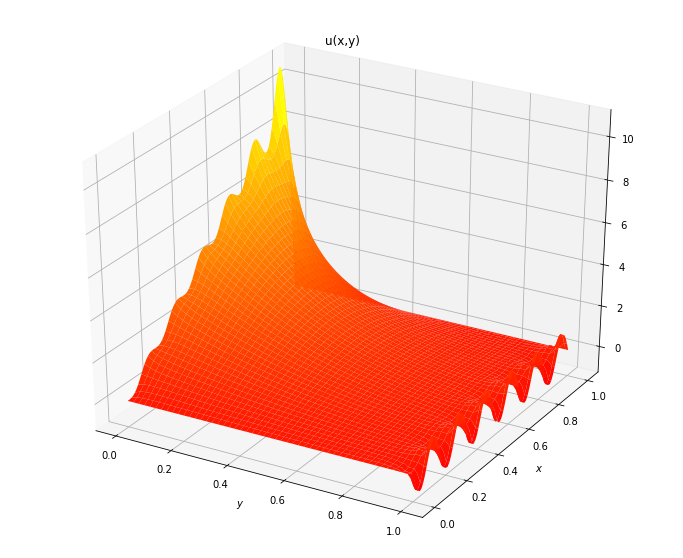

In [3]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
y = linspace(0,1.0,100)

X,Y = np.meshgrid(x,y)

U = u_x_y(x,y)

plt.xlabel('$y$'); plt.ylabel('$x$'); 
plt.title("u(x,y)")
ax.plot_surface(X, Y, U, cmap="autumn");